<a href="https://colab.research.google.com/github/RO-AD/waymo-od-motion-pred/blob/main/tutorial/5_dataset-visualization/gp-dataset-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 시각화

## [0] 환경세팅

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# 구글 드라이브 위치. 마운트 잘 됐는지 확인.
GDRIVE_WOD_PATH = "/content/drive/MyDrive/waymo-od-dataset/motion_v_1_2_0/uncompressed"
VALIDSET_PATH   = GDRIVE_WOD_PATH + "/scenario/validation"

# 마운트 확인
!ls -al {VALIDSET_PATH} | wc -l

Mounted at /content/drive
151


In [16]:
%%capture

!pip3 install --upgrade pip
!pip install waymo-open-dataset-tf-2-11-0==1.5.1
!pip install --upgrade Pillow

In [164]:
import glob

# 로컬 디렉토리에 저장된 TFRecord 파일들의 경로 리스트 생성
file_paths = glob.glob(VALIDSET_PATH + "/validation.tfrecord-000*")
len(file_paths)

100

In [165]:
import tensorflow as tf
from waymo_open_dataset.protos import scenario_pb2

# TFRecordDataset 클래스를 사용하여 데이터를 읽어들임
dataset = tf.data.TFRecordDataset(file_paths)

for data in dataset:
  scenario = scenario_pb2.Scenario()
  scenario.ParseFromString(bytearray(data.numpy()))
  break

scenario.scenario_id

'a3cfb7f093ccd29'

## [1] Map 시각화

[]

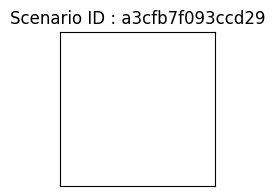

In [166]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2,2))
ax.title.set_text("Scenario ID : " + scenario.scenario_id)
ax.set_xticks([])
ax.set_yticks([])

### [1-1] 정적 맵 시각화

#### [1-1-1] 각 요소 하나씩 시각화 해보기

- map 종류에는 [lane, road_line, road_edge, stop_sign, crosswalk, speed_bump, diveway]가 있다. 하나씩 시각화하는 함수를 만들어본다

[]

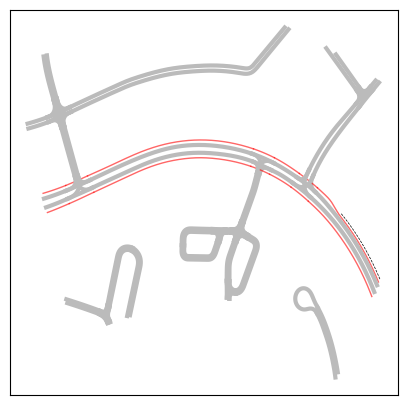

In [195]:
# LaneCenter lane 시각화
def vizLaneCenter(ax, feature):
    x_points = []
    y_points = []
    z_points = []

    for p in feature.polyline:
      x_points.append(p.x)
      y_points.append(p.y)
      z_points.append(p.z)

    if feature.type == 0:
      # TYPE_UNDEFINED
      ax.plot(x_points, y_points, '--', c='#000', lw=0.5) # 검은색
    elif feature.type == 1:
      # TYPE_FREEWAY
      ax.plot(x_points, y_points, '-', c='#00F9', lw=1) # 파란색
    elif feature.type == 2:
      # TYPE_SURFACE_STREET (노면 도로)
      ax.plot(x_points, y_points, '-', c='#BBB', lw=3) # 연한 회색
    elif feature.type == 3:
      # TYPE_BIKE_LANE (자전거 도로)
      ax.plot(x_points, y_points, '-', c='#F009', lw=1) # 빨간색


fig, ax = plt.subplots(figsize=(5,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    vizLaneCenter(ax, map_feature.lane)

ax.set_xticks([])
ax.set_yticks([])

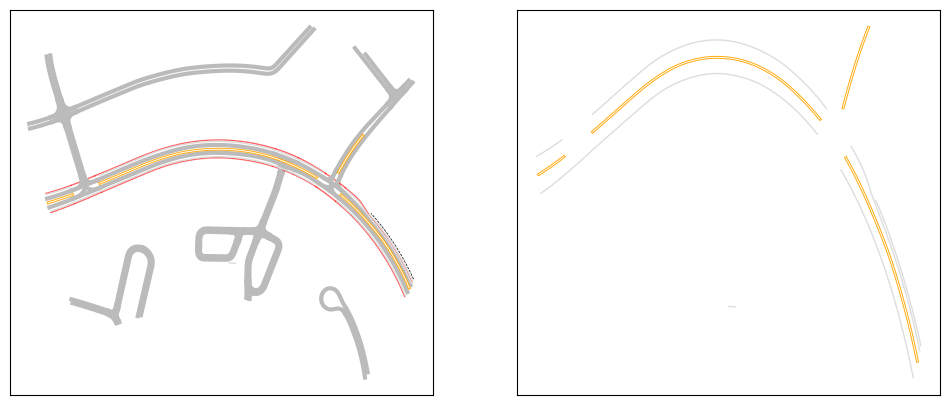

In [196]:
# RoadLine road_line 시각화
def vizRoadLine(ax, feature):
    x_points = []
    y_points = []
    z_points = []

    for p in feature.polyline:
      x_points.append(p.x)
      y_points.append(p.y)
      z_points.append(p.z)

    if feature.type == 0:
      # TYPE_UNKNOWN
      ax.plot(x_points, y_points, linestyle='--', c='#000a', lw=1)
    elif feature.type == 1:
      # TYPE_BROKEN_SINGLE_WHITE
      ax.plot(x_points, y_points, linestyle='--', c='#ddd', lw=1)
    elif feature.type == 2:
      # TYPE_SOLID_SINGLE_WHITE
      ax.plot(x_points, y_points, linestyle='-', c='#ddd', lw=1)
    elif feature.type == 3:
      # TYPE_SOLID_DOUBLE_WHITE
      ax.plot(x_points, y_points, linestyle='-', c='#ddd', lw=2.1)
      ax.plot(x_points, y_points, linestyle='-', c='#ddd', lw=0.7)
    elif feature.type == 4:
      # TYPE_BROKEN_SINGLE_YELLOW
      ax.plot(x_points, y_points, '--', c='#FFA500A0', lw=1)
    elif feature.type == 5:
      # TYPE_BROKEN_DOUBLE_YELLOW
      ax.plot(x_points, y_points, '--', c='#FFA500F0', lw=3)
      ax.plot(x_points, y_points, '--', c='#FFF', lw=1)
    elif feature.type == 6:
      # TYPE_SOLID_SINGLE_YELLOW
      ax.plot(x_points, y_points, '-', c='#FFA500A0', lw=1)
    elif feature.type == 7:
      # TYPE_SOLID_DOUBLE_YELLOW
      ax.plot(x_points, y_points, '-', c='#FFA500F0', lw=2.1)
      ax.plot(x_points, y_points, '-', c='#FFF', lw=0.7)
    elif feature.type == 8:
      # TYPE_PASSING_DOUBLE_YELLOW
      ax.plot(x_points, y_points, '-', c='#FFA500F0', lw=2.1)
      ax.plot(x_points, y_points, '-', c='#FFF', lw=0.7)


fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    vizLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    vizRoadLine(ax_all, map_feature.road_line)
    vizRoadLine(ax, map_feature.road_line)

ax_all.set_xticks([])
ax_all.set_yticks([])

ax.set_xticks([])
ax.set_yticks([])

plt.show()

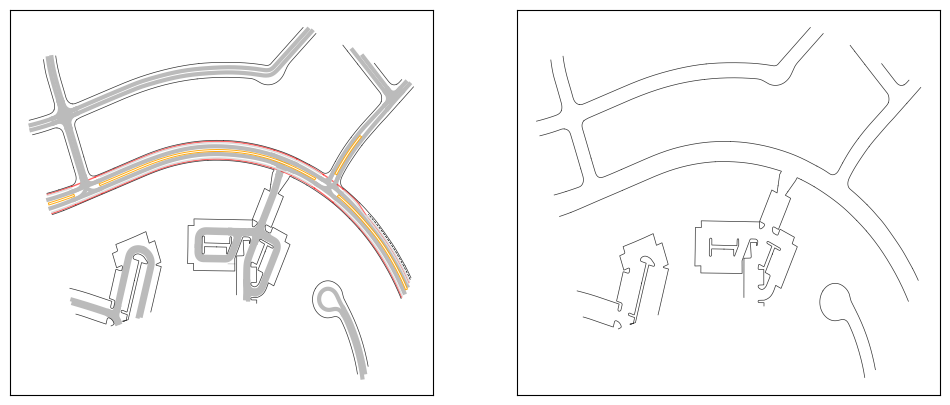

In [197]:
# RoadEdge road_edge 시각화
def vizRoadEdge(ax, feature):
    x_points = []
    y_points = []
    z_points = []

    for p in feature.polyline:
      x_points.append(p.x)
      y_points.append(p.y)
      z_points.append(p.z)

    if feature.type == 0:
      # TYPE_UNKNOWN
      ax.plot(x_points, y_points, linestyle='-', c='#000', lw=0.5)
    elif feature.type == 1:
      # TYPE_ROAD_EDGE_BOUNDARY
      ax.plot(x_points, y_points, linestyle='-', c='#000c', lw=0.5)
    elif feature.type == 2:
      # TYPE_ROAD_EDGE_MEDIAN
      ax.plot(x_points, y_points, linestyle='--', c='#000c', lw=0.5)


fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    vizLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    vizRoadLine(ax_all, map_feature.road_line)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_edge'):
    vizRoadEdge(ax_all, map_feature.road_edge)
    vizRoadEdge(ax, map_feature.road_edge)

ax_all.set_xticks([])
ax_all.set_yticks([])

ax.set_xticks([])
ax.set_yticks([])

plt.show()

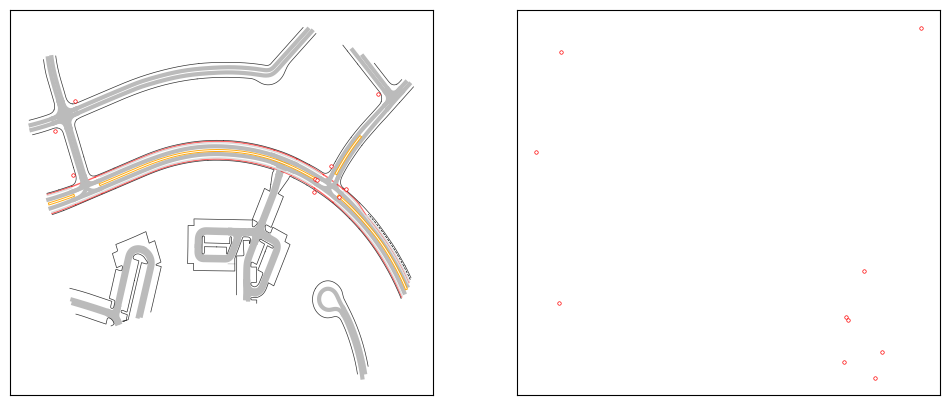

In [204]:
# StopSign stop_sign 시각화
def vizStopSign(ax, feature):
  ax.plot(feature.position.x, feature.position.y, 'o', c='#f00', ms=2)
  ax.plot(feature.position.x, feature.position.y, 'o', c='#fff', ms=1)


fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    vizLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    vizRoadLine(ax_all, map_feature.road_line)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_edge'):
    vizRoadEdge(ax_all, map_feature.road_edge)

for map_feature in scenario.map_features:
  if map_feature.HasField('stop_sign'):
    vizStopSign(ax_all, map_feature.stop_sign)
    vizStopSign(ax, map_feature.stop_sign)

ax_all.set_xticks([])
ax_all.set_yticks([])

ax.set_xticks([])
ax.set_yticks([])

plt.show()

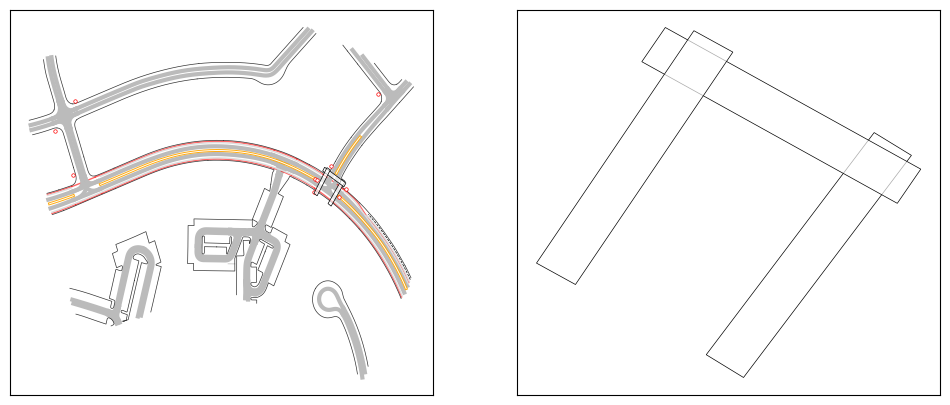

In [233]:
from matplotlib.patches import Polygon

# Crosswalk crosswalk 시각화
def vizCrosswalk(ax, feature):
    points = []

    for p in feature.polygon:
      points.append([p.x, p.y])

    # 다각형 그리기
    polygon = Polygon(points,
                      facecolor='#FFFA', edgecolor='#000',
                      linewidth=0.5,
                      zorder=2)
    ax.add_patch(polygon)

fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    vizLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    vizRoadLine(ax_all, map_feature.road_line)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_edge'):
    vizRoadEdge(ax_all, map_feature.road_edge)

for map_feature in scenario.map_features:
  if map_feature.HasField('stop_sign'):
    vizStopSign(ax_all, map_feature.stop_sign)

for map_feature in scenario.map_features:
  if map_feature.HasField('crosswalk'):
    vizCrosswalk(ax_all, map_feature.crosswalk)
    vizCrosswalk(ax, map_feature.crosswalk)

ax_all.set_xticks([])
ax_all.set_yticks([])

ax.set_xticks([])
ax.set_yticks([])
ax.autoscale()

plt.show()

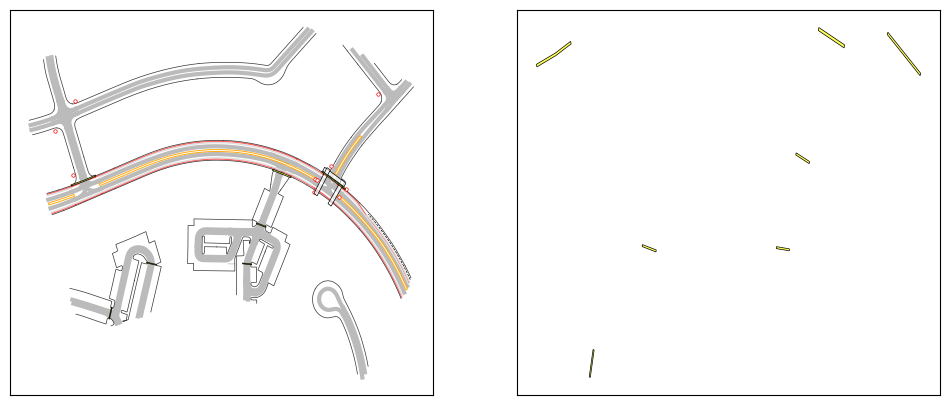

In [234]:
# SpeedBump speed_bump 시각화
def vizSpeedBump(ax, feature):
    points = []

    for p in feature.polygon:
      points.append([p.x, p.y])

    # 다각형 그리기
    polygon = Polygon(points,
                      facecolor='#FF0A', edgecolor='#000',
                      linewidth=0.5,
                      zorder=2)
    ax.add_patch(polygon)

fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    vizLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    vizRoadLine(ax_all, map_feature.road_line)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_edge'):
    vizRoadEdge(ax_all, map_feature.road_edge)

for map_feature in scenario.map_features:
  if map_feature.HasField('stop_sign'):
    vizStopSign(ax_all, map_feature.stop_sign)

for map_feature in scenario.map_features:
  if map_feature.HasField('crosswalk'):
    vizCrosswalk(ax_all, map_feature.crosswalk)

for map_feature in scenario.map_features:
  if map_feature.HasField('speed_bump'):
    vizSpeedBump(ax_all, map_feature.speed_bump)
    vizSpeedBump(ax, map_feature.speed_bump)

ax_all.set_xticks([])
ax_all.set_yticks([])

ax.set_xticks([])
ax.set_yticks([])
ax.autoscale()

plt.show()

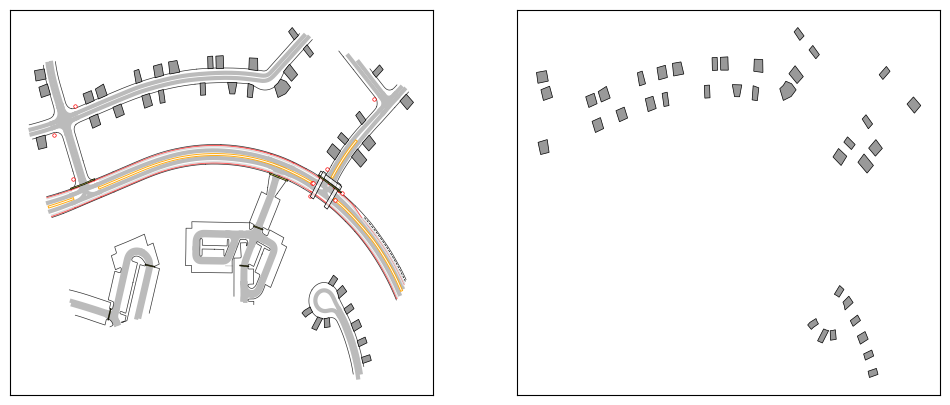

In [241]:
# Driveway driveway 시각화
def vizDriveway(ax, feature):
    points = []

    for p in feature.polygon:
      points.append([p.x, p.y])

    # 다각형 그리기
    polygon = Polygon(points,
                      facecolor='#999', edgecolor='#000',
                      linewidth=0.5,
                      zorder=2)
    ax.add_patch(polygon)

fig, (ax_all, ax) = plt.subplots(1, 2, figsize=(12,5))

for map_feature in scenario.map_features:
  if map_feature.HasField('lane'):
    vizLaneCenter(ax_all, map_feature.lane)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_line'):
    vizRoadLine(ax_all, map_feature.road_line)

for map_feature in scenario.map_features:
  if map_feature.HasField('road_edge'):
    vizRoadEdge(ax_all, map_feature.road_edge)

for map_feature in scenario.map_features:
  if map_feature.HasField('stop_sign'):
    vizStopSign(ax_all, map_feature.stop_sign)

for map_feature in scenario.map_features:
  if map_feature.HasField('crosswalk'):
    vizCrosswalk(ax_all, map_feature.crosswalk)

for map_feature in scenario.map_features:
  if map_feature.HasField('speed_bump'):
    vizSpeedBump(ax_all, map_feature.speed_bump)

for map_feature in scenario.map_features:
  if map_feature.HasField('driveway'):
    vizDriveway(ax_all, map_feature.driveway)
    vizDriveway(ax, map_feature.driveway)

ax_all.set_xticks([])
ax_all.set_yticks([])

ax.set_xticks([])
ax.set_yticks([])
ax.autoscale()

plt.show()

#### [1-1-2] 위 코드를 합쳐서 정적 맵 시각화 클래스 만들기

In [248]:
class StaticMapFeatureVizualizer:

  def draw(self, scenario, ax):
    for map_feature in scenario.map_features:
      if map_feature.HasField('lane'):
          self.vizLaneCenter(ax, map_feature.lane)
      elif map_feature.HasField('road_line'):
          self.vizRoadLine(ax, map_feature.road_line)
      elif map_feature.HasField('road_edge'):
          self.vizRoadEdge(ax, map_feature.road_edge)
      elif map_feature.HasField('stop_sign'):
          self.vizStopSign(ax, map_feature.stop_sign)
      elif map_feature.HasField('crosswalk'):
          self.vizCrosswalk(ax, map_feature.crosswalk)
      elif map_feature.HasField('speed_bump'):
          self.vizSpeedBump(ax, map_feature.speed_bump)
      elif map_feature.HasField('driveway'):
          self.vizDriveway(ax, map_feature.driveway)

    return

  def _seperate_polyline(self, polyline):
    X, Y, Z = [], [], []

    for p in polyline:
      X.append(p.x)
      Y.append(p.y)
      Z.append(p.z)
    
    return X, Y, Z
  
  def _create_polygon(self, polygon, facecolor, edgecolor,
                      linewidth=0.5,
                      zorder=2):
    points = []

    for p in polygon:
      points.append([p.x, p.y])

    polygon = Polygon(points,
              facecolor=facecolor, edgecolor=edgecolor,
              linewidth=linewidth,
              zorder=zorder)
    return polygon

  def vizLaneCenter(self, ax, feature):
    ''' LaneCenter lane 시각화 '''
    X, Y, Z = self._seperate_polyline(feature.polyline)
    
    if feature.type == 0:
      # TYPE_UNDEFINED
      ax.plot(X, Y, '--', c='#000', lw=0.5) # 검은색
    elif feature.type == 1:
      # TYPE_FREEWAY
      ax.plot(X, Y, '-', c='#00F9', lw=1) # 파란색
    elif feature.type == 2:
      # TYPE_SURFACE_STREET (노면 도로)
      ax.plot(X, Y, '-', c='#BBB', lw=3) # 연한 회색
    elif feature.type == 3:
      # TYPE_BIKE_LANE (자전거 도로)
      ax.plot(X, Y, '-', c='#F009', lw=1) # 빨간색

  def vizRoadLine(self, ax, feature):
    ''' RoadLine road_line 시각화 '''
    X, Y, Z = self._seperate_polyline(feature.polyline)

    if feature.type == 0:
      # TYPE_UNKNOWN
      ax.plot(X, Y, linestyle='--', c='#000a', lw=1)
    elif feature.type == 1:
      # TYPE_BROKEN_SINGLE_WHITE
      ax.plot(X, Y, linestyle='--', c='#ddd', lw=1)
    elif feature.type == 2:
      # TYPE_SOLID_SINGLE_WHITE
      ax.plot(X, Y, linestyle='-', c='#ddd', lw=1)
    elif feature.type == 3:
      # TYPE_SOLID_DOUBLE_WHITE
      ax.plot(X, Y, linestyle='-', c='#ddd', lw=2.1)
      ax.plot(X, Y, linestyle='-', c='#ddd', lw=0.7)
    elif feature.type == 4:
      # TYPE_BROKEN_SINGLE_YELLOW
      ax.plot(X, Y, '--', c='#FFA500A0', lw=1)
    elif feature.type == 5:
      # TYPE_BROKEN_DOUBLE_YELLOW
      ax.plot(X, Y, '--', c='#FFA500F0', lw=3)
      ax.plot(X, Y, '--', c='#FFF', lw=1)
    elif feature.type == 6:
      # TYPE_SOLID_SINGLE_YELLOW
      ax.plot(X, Y, '-', c='#FFA500A0', lw=1)
    elif feature.type == 7:
      # TYPE_SOLID_DOUBLE_YELLOW
      ax.plot(X, Y, '-', c='#FFA500F0', lw=2.1)
      ax.plot(X, Y, '-', c='#FFF', lw=0.7)
    elif feature.type == 8:
      # TYPE_PASSING_DOUBLE_YELLOW
      ax.plot(X, Y, '-', c='#FFA500F0', lw=2.1)
      ax.plot(X, Y, '-', c='#FFF', lw=0.7)
  
  def vizRoadEdge(self, ax, feature):
    ''' RoadEdge road_edge 시각화 '''
    X, Y, Z = self._seperate_polyline(feature.polyline)

    if feature.type == 0:
      # TYPE_UNKNOWN
      ax.plot(X, Y, linestyle='-', c='#000', lw=0.5)
    elif feature.type == 1:
      # TYPE_ROAD_EDGE_BOUNDARY
      ax.plot(X, Y, linestyle='-', c='#000c', lw=0.5)
    elif feature.type == 2:
      # TYPE_ROAD_EDGE_MEDIAN
      ax.plot(X, Y, linestyle='--', c='#000c', lw=0.5)

  def vizStopSign(self, ax, feature):
    ''' StopSign stop_sign 시각화 '''
    ax.plot(feature.position.x, feature.position.y, 'o', c='#f00', ms=2)
    ax.plot(feature.position.x, feature.position.y, 'o', c='#fff', ms=1)

  def vizCrosswalk(self, ax, feature):
    ''' Crosswalk crosswalk 시각화 '''
    polygon = self._create_polygon(feature.polygon,
                              facecolor='#FFFA', edgecolor='#000')
    ax.add_patch(polygon)

  
  def vizSpeedBump(self, ax, feature):
    ''' SpeedBump speed_bump 시각화 '''
    polygon = self._create_polygon(feature.polygon,
                              facecolor='#FF0A', edgecolor='#000')
    ax.add_patch(polygon)

  def vizDriveway(self, ax, feature):
    ''' Driveway driveway 시각화 '''
    polygon = self._create_polygon(feature.polygon,
                              facecolor='#999', edgecolor='#000')
    ax.add_patch(polygon)

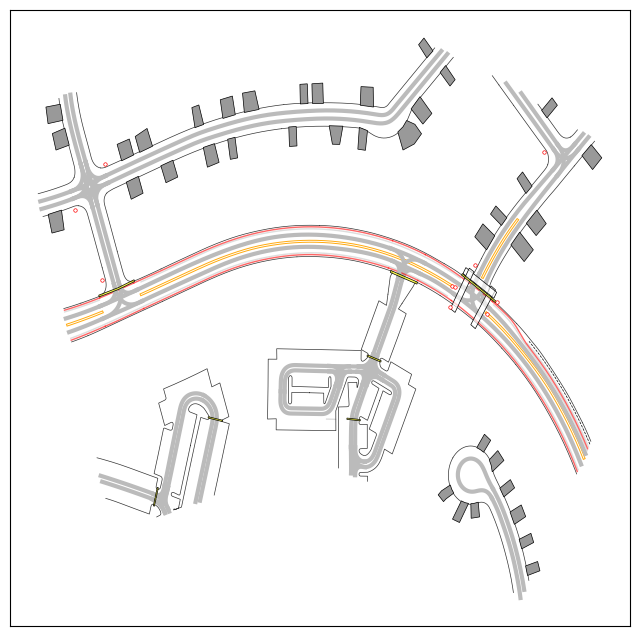

In [249]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks([])
ax.set_yticks([])

static_map_feature_vizualizer = StaticMapFeatureVizualizer()
static_map_feature_vizualizer.draw(scenario, ax)

plt.show()

### [1-2] 동적 맵 시각화

## [2] Agent 시각화

# 기타

In [ ]:
# tutorial/5_dataset-visualization/gp-dataset-visualization.ipynb